In [3]:
import sys
print(sys.version)


3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [4]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00


In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
import tensorflow

In [3]:
tensorflow.__version__

'2.17.1'

In [6]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = "./"  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator


In [7]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [9]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [10]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:

Quantum pre-processing of test images:


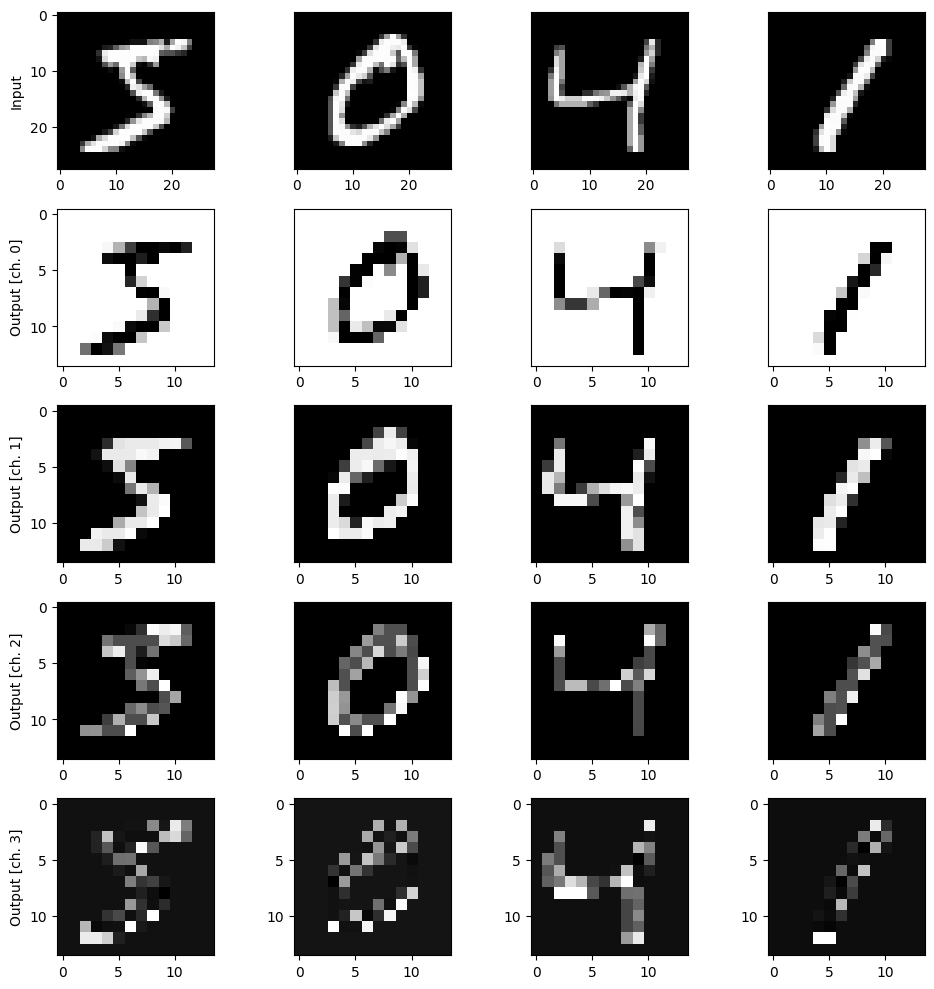

In [11]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

EFFNET

In [22]:
# !pip install torch==2.2
# !pip install torchvision
# !pip install seaborn
# !pip install numpy
# !pip install matplotlib
# !pip install torchsummary
# !pip install torchview
# !pip install graphviz
# !pip install torchviz
# !pip install pandas
# !pip install efficientnet_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 832.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 810.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import seaborn as sns
import numpy as np

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [58]:
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")


In [59]:
q_train_images = torch.Tensor(q_train_images)
q_test_images = torch.Tensor(q_test_images)

print(f'shape of quantum train data: {q_train_images.shape}')
print(f'shape of quantum test data: {q_test_images.shape}')
print(f'shape of train labels: {len(train_labels)}')
print(f'shape of test labels: {len(test_labels)}')

reshaped_train_labels = torch.Tensor(train_labels.tolist() * 4).to(torch.int64)
reshaped_test_labels = torch.Tensor(test_labels.tolist() * 4).to(torch.int64)

print(f'shape of reshaped test labels: {reshaped_train_labels.shape}')
print(f'shape of test labels: {reshaped_test_labels.shape}')

shape of quantum train data: torch.Size([50, 14, 14, 4])
shape of quantum test data: torch.Size([30, 14, 14, 4])
shape of train labels: 50
shape of test labels: 30
shape of reshaped test labels: torch.Size([200])
shape of test labels: torch.Size([120])


In [60]:
train_output_shape = (4 * 50,14,14)
q_train_images = np.transpose(q_train_images, (3, 0, 1, 2))
q_train_images = np.reshape(q_train_images, train_output_shape)
q_train_images = np.transpose(q_train_images, (0, 2, 1))

test_output_shape = (4 * 30, 14,14)
q_test_images = np.transpose(q_test_images, (3, 0, 1, 2))
q_test_images = np.reshape(q_test_images, test_output_shape)
q_test_images = np.transpose(q_test_images, (0, 2,1))


In [61]:
print(f'shape of quantum train data: {q_train_images.shape}')
print(f'shape of quantum test data: {q_test_images.shape}')

shape of quantum train data: torch.Size([200, 14, 14])
shape of quantum test data: torch.Size([120, 14, 14])


In [64]:
BATCH_SIZE = 64
num_epoch = 5
learning_rate = 1e-4
class_size = 10

In [65]:
from torch.utils.data import TensorDataset, DataLoader

qcifar_train_dataset = TensorDataset(q_train_images, reshaped_train_labels)
q_train_loader = DataLoader(qcifar_train_dataset, batch_size=BATCH_SIZE)

qcifar_test_dataset = TensorDataset(q_test_images, reshaped_test_labels)
q_test_loader = DataLoader(qcifar_test_dataset, batch_size=BATCH_SIZE)

In [76]:
q_imgs, q_labels = next(iter(q_train_loader))

print(q_imgs.shape)
print(q_labels.shape)
print(q_labels.dtype)

torch.Size([64, 14, 14])
torch.Size([64])
torch.int64


In [68]:
from torchvision import models

model = models.efficientnet_v2_s(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 100MB/s] 


In [77]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [71]:
input_last_year = model.classifier[1].in_features
model.classifier[1] = nn.Linear(input_last_year, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)

In [72]:
epoch_loss_history = []
epoch_acc_history = []

In [ ]:
for epoch in range(num_epoch):
    epoch_avg_loss = 0
    for i, (imgs, labels) in enumerate(q_train_loader):
        imgs=torch.from_numpy(np.expand_dims(imgs,axis=1))
        imgs=torch.nn.Conv2d(1, 3, 1)(imgs)

        print(imgs.shape)
        imgs = transforms.Resize((224, 224))(imgs.to(device))
        # imgs = imgs.to(device)
        labels = labels.to(device)

        labels_hat = model(imgs)
        n_corrects = (labels_hat.argmax(axis=1) == labels).sum().item()
        loss_value = criterion(labels_hat, labels)
        loss_value.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_avg_loss += loss_value.item()

        accuracy = (n_corrects / labels.size(0)) * 100

        if (i+1) % 50 == 0:
            print(f'epoch {epoch + 1}/{num_epoch}, step: {i + 1}/{train_end*4/BATCH_SIZE}: loss = {loss_value:.5f}, acc = {accuracy:.2f}')

    epoch_loss_history.append(epoch_avg_loss / len(q_train_loader))

    with torch.no_grad():
        correct = 0
        samples = 0

        for i, (images, labels) in enumerate(q_test_loader):
            imgs=torch.from_numpy(np.expand_dims(imgs,axis=1))
            imgs=torch.nn.Conv2d(1, 3, 1)(imgs)

            images = transforms.Resize((224, 224))(images.to(device))
            # images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predictions = outputs.max(1)
            correct += (predictions == labels).sum()
            samples += predictions.size(0)

        accuracy = float(correct) / float(samples) * 100
        epoch_acc_history.append(accuracy)

        print(f"epoch {epoch + 1}/{num_epoch}, val accuracy = {accuracy:.2f}%. Correct {correct} out of {samples} samples")

torch.Size([64, 3, 14, 14])
torch.Size([64, 3, 14, 14])


In [ ]:
print(epoch_loss_history)
with open('loss_history.txt', "w") as f:
    for item in epoch_loss_history:
        f.write(f'{item:.5f}\n')

In [ ]:
print(epoch_acc_history)
with open('acc_history.txt', "w") as f:
    for item in epoch_acc_history:
        f.write(f'{item:.5f}\n')

In [ ]:
torch.save(model, 'effnet_cifar_w4_x_s1.pth')

Standard

In [12]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [13]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)


Epoch 1/30
13/13 - 1s - 73ms/step - accuracy: 0.1600 - loss: 2.7764 - val_accuracy: 0.1667 - val_loss: 2.2773
Epoch 2/30
13/13 - 0s - 27ms/step - accuracy: 0.3400 - loss: 1.9360 - val_accuracy: 0.2333 - val_loss: 2.1360
Epoch 3/30
13/13 - 0s - 6ms/step - accuracy: 0.6000 - loss: 1.6149 - val_accuracy: 0.4000 - val_loss: 1.9140
Epoch 4/30
13/13 - 0s - 6ms/step - accuracy: 0.7000 - loss: 1.3120 - val_accuracy: 0.4667 - val_loss: 1.7740
Epoch 5/30
13/13 - 0s - 6ms/step - accuracy: 0.8200 - loss: 1.0931 - val_accuracy: 0.5333 - val_loss: 1.6698
Epoch 6/30
13/13 - 0s - 11ms/step - accuracy: 0.9000 - loss: 0.9142 - val_accuracy: 0.5333 - val_loss: 1.5845
Epoch 7/30
13/13 - 0s - 10ms/step - accuracy: 0.9400 - loss: 0.7713 - val_accuracy: 0.5667 - val_loss: 1.5093
Epoch 8/30
13/13 - 0s - 5ms/step - accuracy: 0.9600 - loss: 0.6571 - val_accuracy: 0.6000 - val_loss: 1.4463
Epoch 9/30
13/13 - 0s - 6ms/step - accuracy: 0.9800 - loss: 0.5630 - val_accuracy: 0.6000 - val_loss: 1.3954
Epoch 10/30
13/

In [ ]:
c_model.summary()

In [14]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 1s - 59ms/step - accuracy: 0.1400 - loss: 2.3995 - val_accuracy: 0.1333 - val_loss: 2.2193
Epoch 2/30
13/13 - 0s - 5ms/step - accuracy: 0.2800 - loss: 2.0069 - val_accuracy: 0.3000 - val_loss: 2.0660
Epoch 3/30
13/13 - 0s - 12ms/step - accuracy: 0.5400 - loss: 1.7206 - val_accuracy: 0.3667 - val_loss: 1.9191
Epoch 4/30
13/13 - 0s - 10ms/step - accuracy: 0.7400 - loss: 1.4759 - val_accuracy: 0.4333 - val_loss: 1.7858
Epoch 5/30
13/13 - 0s - 11ms/step - accuracy: 0.8400 - loss: 1.2676 - val_accuracy: 0.4667 - val_loss: 1.6711
Epoch 6/30
13/13 - 0s - 11ms/step - accuracy: 0.9400 - loss: 1.0929 - val_accuracy: 0.5333 - val_loss: 1.5757
Epoch 7/30
13/13 - 0s - 7ms/step - accuracy: 0.9600 - loss: 0.9477 - val_accuracy: 0.5333 - val_loss: 1.4973
Epoch 8/30
13/13 - 0s - 10ms/step - accuracy: 0.9600 - loss: 0.8273 - val_accuracy: 0.6333 - val_loss: 1.4324
Epoch 9/30
13/13 - 0s - 11ms/step - accuracy: 0.9600 - loss: 0.7273 - val_accuracy: 0.6667 - val_loss: 1.3783
Epoch 10/30


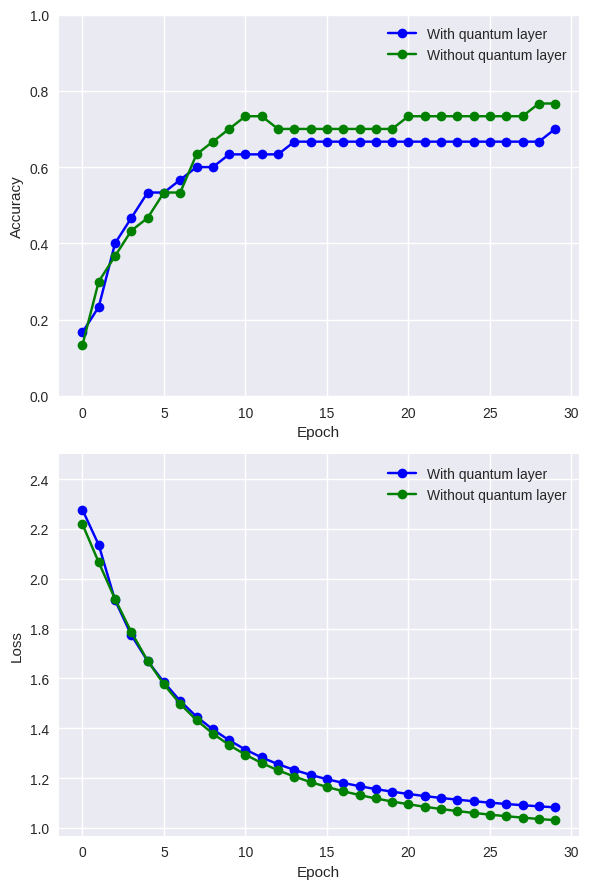

In [16]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()